In [302]:
!python3 --version
import random
import torch
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sentencepiece as spm

# Generate the same random numbers
torch.manual_seed(42)

Python 3.10.12


In [303]:
input_file = 'names.txt'
prefix = 'm'
vocab_size = 100

spm.SentencePieceTrainer.train(
    input=input_file, 
    model_prefix=prefix, 
    vocab_size=vocab_size,
    user_defined_symbols=['</s>']
)

class Tokenizer:
    def __init__(self):
        self.sp = spm.SentencePieceProcessor()
        self.sp.load(f'{prefix}.model')
        self.vocab_size = self.sp.get_piece_size()

    def encode(self, name):
        return self.sp.encode_as_ids(name)

    def decode(self, tokens):
        return self.sp.decode_ids(tokens)
    
tokenizer = Tokenizer()

# for i in range((vocab_size)):
#     print(i, end=':')
#     print(tokenizer.decode([i]), end=' ')

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: names.txt
  input_format: 
  model_prefix: m
  model_type: UNIGRAM
  vocab_size: 100
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: </s>
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_pri

In [304]:
# print(tokenizer.vocab_size)  # 29
foo = tokenizer.encode('john') # [2, 12, 17, 10, 16, 1]
bar = tokenizer.decode([10])    # john
print(bar)
print(foo)
for i in range((vocab_size)):
    print(i, end=':')
    print(tokenizer.decode([i]), end=' ')

r
[70, 15, 8]
0: ⁇  1: 2:</s> 3: 4:a 5:i 6:e 7:s 8:n 9:y 10:r 11:t 12:d 13:o 14:an 15:h 16:u 17:l 18:a 19:m 20:ri 21:z 22:k 23:ra 24:la 25:on 26:li 27:na 28:b 29:el 30:c 31:ja 32:re 33:ah 34:ka 35:b 36:le 37:g 38:er 39:en 40:ma 41:ya 42:ni 43:p 44:w 45:vi 46:in 47:v 48:x 49:sh 50:ma 51:mi 52:da 53:j 54:ca 55:ke 56:th 57:g 58:yn 59:lyn 60:f 61:sa 62:lo 63:ha 64:ry 65:sha 66:de 67:va 68:za 69:ce 70:jo 71:ell 72:lee 73:ve 74:ly 75:je 76:ley 77:lynn 78:ta 79:ka 80:f 81:lin 82:anna 83:ro 84:ton 85:al 86:ch 87:ch 88:mi 89:ck 90:q 91:len 92:mar 93:iyah 94:em 95:den 96:me 97:co 98:mari 99:leigh 

In [305]:

class Dataset(torch.utils.data.Dataset):
  def __init__(self):
    with open('names.txt', 'r') as f:
      self.names = f.read().split('\n')
    self.tokenizer = Tokenizer()

  def __len__(self):
    # Return number of names
    return len(self.names)

  def __getitem__(self, idx):
    # Get name at index
    name = self.names[idx]
    # Return encoded name
    return torch.tensor(self.tokenizer.encode(name))


ds = Dataset()
dl = torch.utils.data.DataLoader(ds, batch_size=1, shuffle=True)

BESFORMER

In [306]:

class BesSimpleTransformer(torch.nn.Module):
  def __init__(self):
    super(BesSimpleTransformer, self).__init__()
    # Embedding part of the model - 7 is the embedding size
    self.embedding    = torch.nn.Embedding(tokenizer.vocab_size, 7)
    self.pos_emb      = self.get_pos_matrix()
    # Mask tensor trick - if batch size is one, we might not need it - research it!
    self.register_buffer('mask', torch.tril(torch.ones(19, 19)))
    # First decoder block
    # 11 could be anything, if we have heads or batch_size this might change
    self.layer_00_key = torch.nn.Linear(7, 7)
    self.layer_00_qry = torch.nn.Linear(7, 7)
    self.layer_00_val = torch.nn.Linear(7, 7)

    self.layer_00_ffw = torch.nn.Linear(7, 7)
    # Second decoder block
    self.layer_01_key = torch.nn.Linear(7, 7)
    self.layer_01_qry = torch.nn.Linear(7, 7)
    self.layer_01_val = torch.nn.Linear(7, 7)
    self.layer_01_ffw = torch.nn.Linear(7, 7)

    self.norm_00_1 = torch.nn.LayerNorm(7)
    self.norm_00_2 = torch.nn.LayerNorm(7)
    self.norm_01_1 = torch.nn.LayerNorm(7)
    self.norm_01_2 = torch.nn.LayerNorm(7)
        # Output of the model
    self.map_to_vocab = torch.nn.Linear(7, tokenizer.vocab_size)

  def forward(self, x):
      emb = self.embedding(x)
      pos = self.pos_emb[0:x.shape[0], :]
      emb = emb + pos

      key = self.layer_00_key(emb)
      qry = self.layer_00_qry(emb)
      val = self.layer_00_val(emb)
      att = torch.mm(qry, key.t())
      msk = self.mask[0:x.shape[0], 0:x.shape[0]]
      att = att.masked_fill(msk == 0, float('-inf'))
      att_00 = torch.nn.functional.softmax(att, dim=1)
      att = torch.nn.functional.softmax(att, dim=1)
      res = torch.mm(att, val)
      
      # Apply first normalization
      res = self.norm_00_1(res + emb)
      
      # this is the feed-forward layer
      res = self.layer_00_ffw(res)
      
      # Apply second normalization
      res = self.norm_00_2(res)

      key = self.layer_01_key(res)
      qry = self.layer_01_qry(res)
      val = self.layer_01_val(res)
      att = torch.mm(qry, key.t())
      msk = self.mask[0:x.shape[0], 0:x.shape[0]]
      att = att.masked_fill(msk == 0, float('-inf'))
      att_01 = torch.nn.functional.softmax(att, dim=1)
      att = torch.nn.functional.softmax(att, dim=1)
      res = torch.mm(att, val)
      
      # Apply first normalization for second block
      res = self.norm_01_1(res + self.layer_00_ffw(emb))
      
      res = self.layer_01_ffw(res)
      
      # Apply second normalization for second block
      res = self.norm_01_2(res)

      out = self.map_to_vocab(res)
      return out, [att_00, att_01]



  # def get_pos_matrix(self):
  #   store = torch.zeros(19, 7)
  #   for pos in range(19):
  #     # why do we do this range thing
  #     for i in range(0, 7, 2):
  #       denominator = 10000 ** (2 * i / 7)
  #       store[pos, i] = math.sin(pos / denominator)
  #       if i + 1 < 7: store[pos, i + 1] = math.cos(pos / denominator)
  #   return store
  def get_pos_matrix(self, max_seq_len=100):
    store = torch.zeros(max_seq_len, 7)
    for pos in range(max_seq_len):
        for i in range(0, 7, 2):
            denominator = 10000 ** (2 * i / 7)
            store[pos, i] = math.sin(pos / denominator)
            if i + 1 < 7: store[pos, i + 1] = math.cos(pos / denominator)
    return store


m = BesSimpleTransformer()

# SDG instead of Adam, why?
opt = torch.optim.Adam(m.parameters(), lr=0.01)

In [307]:
loss_history = []
num_epochs = 3
for epoch in range(num_epochs):
  for idx, batch in enumerate(dl):

    # sos = torch.tensor([2])
    # eos = torch.tensor([1])
    # Derive sos and eos from tokenizer
    sos = torch.tensor([tokenizer.sp.piece_to_id('<s>')])
    eos = torch.tensor([tokenizer.sp.piece_to_id('</s>')])


    # for each row in batch
    x = batch[0]
    # add sos to beginning of row
    # x = torch.cat([sos, x])
    # print("x samples:", tokenizer.decode(x.tolist()))
    # # print(x.shape)
    # print(x)
    # In target tensor, add eos to end of each row and remove sos from start
    y = torch.cat([x[1:], eos])
    # print("y samples:", tokenizer.decode(y.tolist()))
    # # print(y.shape)
    # print(y)
    # run our batch through the whole transformer (attention1, ffw, attention2, ffw, linear)
    p, _ = m(x)
    # calculate cross-entropy loss between predicted token and target token
    l = torch.nn.functional.cross_entropy(p, y)
    if idx % 1000 == 0: 
      # loss_history.append(l.item())
      loss_history.append(l.item())
      print("Epoch:", epoch)
      print("Loss:", l.item())
    # print loss every 1000 rows of dataset
    _, predicted = torch.max(p, 1)

    correct = (predicted == y).sum().item()
    total = y.size(0)
    accuracy = 100 * correct / total
    if accuracy > 95:
        print(correct, total, accuracy)
        save_path = f"model_{accuracy}_accuracy.pth"
        torch.save(m.state_dict(), save_path)
        print(f"Model saved with accuracy: {accuracy:.2f}% at {save_path}")

    # correct_indices = (predicted == y).nonzero().squeeze()  

    # incorrect_indices = (predicted != y).nonzero().squeeze()
    # if incorrect_indices.dim() == 0:
    #     print("Classified samples:", tokenizer.decode(correct_indices.tolist()))
    # else:
    #     # if len(incorrect_indices) > 4:
    #     print("Misclassified samples:", tokenizer.decode(incorrect_indices.tolist()))
    #     for idx in incorrect_indices:
    #     # for idx in incorrect_indices[:5]: 
    #         # a = 1
    #         print("True Label:", y[idx].item(),":", tokenizer.decode([y[idx].item()]), "Predicted Label:", predicted[idx].item(), ":", tokenizer.decode([predicted[idx].item()]))
    #     # break

    
    # backpropogate for every row
    l.backward()
    # What is the optimiser doing?  Why is it called after we have done backward pass?
    opt.step()
    opt.zero_grad()
  





Epoch: 0
Loss: 4.523309707641602
Epoch: 0
Loss: 3.524618148803711
Epoch: 0
Loss: 3.848905086517334
3 3 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
Epoch: 0
Loss: 3.5834054946899414
Epoch: 0
Loss: 3.1835238933563232
2 2 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
Epoch: 0
Loss: 3.3449409008026123
Epoch: 0
Loss: 2.758021593093872
2 2 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
3 3 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
Epoch: 0
Loss: 2.6153111457824707
Epoch: 0
Loss: 3.951380491256714
Epoch: 0
Loss: 3.320560932159424
Epoch: 0
Loss: 3.5689806938171387
Epoch: 0
Loss: 2.9013850688934326
Epoch: 0
Loss: 3.8209071159362793
Epoch: 0
Loss: 3.061863422393799
2 2 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
Epoch: 0
Loss: 2.6115667819976807
Epoch: 0
Loss: 3.657926082611084
2 2 100.0
Model saved with accuracy: 100.00% at model_100.0_accuracy.pth
2 2 100.0
Model saved with

In [311]:
def sample(probs, temperature=1.0):
    probs = torch.pow(probs, 1/temperature)
    probs = probs / probs.sum()
    return torch.multinomial(probs, 1)

def top_p_sample(probs, top_p=0.9):
    sorted_probs, sorted_indices = torch.sort(probs, descending=True)
    cumulative_probs = torch.cumsum(sorted_probs, dim=0)
    indices_to_remove = cumulative_probs > top_p
    sorted_probs[indices_to_remove] = 0
    sorted_probs /= sorted_probs.sum()
    return torch.multinomial(sorted_probs, 1)

100


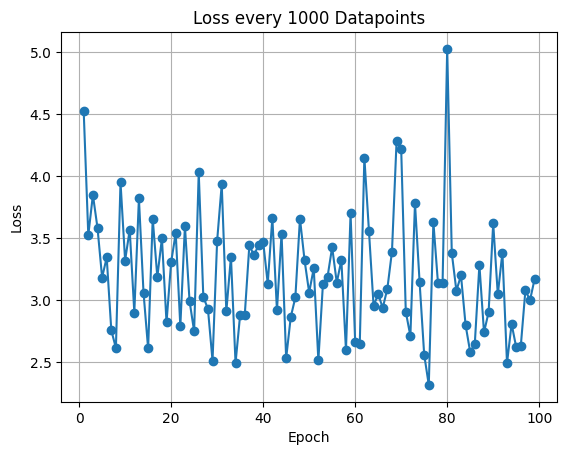

In [312]:
xaxis = len(loss_history) + 1
print(xaxis)
plt.plot(range(1, xaxis), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss every 1000 Datapoints')
plt.grid(True)
plt.show()

In [334]:
m = BesSimpleTransformer()
m.load_state_dict(torch.load("model_100.0_accuracy.pth"))
tokens = []
# generate a random start token for testing
# Get all the tokens/pieces from SentencePiece
all_tokens = [tokenizer.sp.id_to_piece(i) for i in range(tokenizer.vocab_size)]

# Pick a random token/piece
random_token = random.choice(all_tokens)
print("Random token:", random_token)
# Convert the token to its corresponding ID

# random_token = "n"
x = torch.tensor([tokenizer.sp.piece_to_id(random_token)])

def top_p_sample(probs, top_p=0.9):
    sorted_probs, sorted_indices = torch.sort(probs, descending=True)
    cumulative_probs = torch.cumsum(sorted_probs, dim=0)
    indices_to_remove = cumulative_probs > top_p
    sorted_probs[indices_to_remove] = 0
    sorted_probs /= sorted_probs.sum()
    return torch.multinomial(sorted_probs, 1)

top_p_threshold = 0.5

while True:
  tokens.append(x[-1].tolist())
  # run our random start through transformer and get attention matricies out
  p, attention = m(x)
  # create probabilities from 29 token options
  p = torch.nn.functional.softmax(p, dim=1)
  probs = p[-1]
  # choose the best prediction (most probable next token according to tranformer)
  p = sample(probs, 0.9)

  print("Input:", tokenizer.decode(x.tolist()), "Prediction:", tokenizer.decode(p.tolist()) )
  x = torch.cat([x, p[-1].unsqueeze(0)])
  # if p[-1] == 1 or len(p.tolist()) == 17: break
  if len(p.tolist()) == 45: break
print("Generate:", tokenizer.decode(x.tolist()))

Random token: li
Input: li Prediction: a
Input: lia Prediction: </s>
Input: lia</s> Prediction: </s>
Input: lia</s></s> Prediction: </s>
Input: lia</s></s></s> Prediction: </s>
Input: lia</s></s></s></s> Prediction: </s>
Input: lia</s></s></s></s></s> Prediction: </s>
Input: lia</s></s></s></s></s></s> Prediction: </s>
Input: lia</s></s></s></s></s></s></s> Prediction: s
Input: lia</s></s></s></s></s></s></s>s Prediction: </s>
Input: lia</s></s></s></s></s></s></s>s</s> Prediction: </s>
Input: lia</s></s></s></s></s></s></s>s</s></s> Prediction: </s>
Input: lia</s></s></s></s></s></s></s>s</s></s></s> Prediction: n
Input: lia</s></s></s></s></s></s></s>s</s></s></s>n Prediction: an
Input: lia</s></s></s></s></s></s></s>s</s></s></s>nan Prediction: e
Input: lia</s></s></s></s></s></s></s>s</s></s></s>nane Prediction: </s>
Input: lia</s></s></s></s></s></s></s>s</s></s></s>nane</s> Prediction: </s>
Input: lia</s></s></s></s></s></s></s>s</s></s></s>nane</s></s> Prediction: </s>
Input: li

RuntimeError: The size of tensor a (19) must match the size of tensor b (20) at non-singleton dimension 1

In [336]:

import tensorflow as tf

print("GPUS AVAILABLE: ", tf.config.list_physical_devices('GPU'))

2023-08-14 20:10:58.409988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 20:10:58.925701: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPUS AVAILABLE:  []
